# Bitcoin Prediction Model

In [ ]:
#importing packages 
import warnings
warnings.filterwarnings('ignore') # Filter out warnings

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#importing the data
bitcoin = pd.read_csv('bitcoin_price.csv',parse_dates=[0])
nasdaq = pd.read_csv('NASDAQ_1971-2017.csv',parse_dates=[0])
snp = pd.read_csv('S_P500_1950-2017.csv',parse_dates=[0])
dj = pd.read_csv('DowJones_1985-2017.csv',parse_dates=[0])

In [3]:
nasdaq = nasdaq.reindex(index=nasdaq.index[::-1])
nasdaq = nasdaq.drop(nasdaq.head(5).index)
nasdaq = nasdaq.reset_index(drop = True)

snp = snp.reindex(index=snp.index[::-1])
snp = snp.drop(snp.head(5).index)
snp = snp.reset_index(drop = True)

dj = dj.reindex(index=dj.index[::-1])
dj = dj.drop(dj.head(5).index)
dj = dj.reset_index(drop = True)

In [4]:
value = ['2013-04-29']
nasdaq[nasdaq.Date.isin(value)]

,Date,Open,High,Low,Close,Adj Close,Volume
1117,2013-04-29,3290.310059,3315.330078,3289.419922,3307.02002,3307.02002,1594110000


In [5]:
nasdaq = nasdaq.loc[nasdaq.index<1118]
snp = snp.loc[snp.index<1118]
dj = dj.loc[dj.index<1118]

In [6]:
print(bitcoin.shape)
print(nasdaq.shape)
print(snp.shape)
print(dj.shape)

(1620, 7)
(1118, 7)
(1118, 7)
(1118, 7)


In [7]:
lookup = bitcoin

In [8]:
def lookup_df(date):
    match = lookup['Date'] == date
    df = lookup[match]
    return df

In [9]:
df = bitcoin.loc[:0]
for i in range(0,nasdaq.shape[0]):
    df = df.append(lookup_df(nasdaq['Date'][i]))
df = df.iloc[1:]
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-10-03,4408.46,4432.47,4258.89,4317.48,"1,288,020,000","73,181,300,000"
1,2017-10-02,4395.81,4470.23,4377.46,4409.32,"1,431,730,000","72,963,200,000"
4,2017-09-29,4171.62,4214.63,4039.29,4163.07,"1,367,050,000","69,219,200,000"
5,2017-09-28,4197.13,4279.31,4109.70,4174.73,"1,712,320,000","69,633,200,000"
6,2017-09-27,3892.94,4210.05,3884.82,4200.67,"1,686,880,000","64,579,200,000"


In [10]:
print(df.shape)
print(nasdaq.shape)
print(snp.shape)
print(dj.shape)

(1118, 7)
(1118, 7)
(1118, 7)
(1118, 7)


In [11]:
df = df.reset_index(drop = True)

In [12]:
comp = pd.DataFrame(df['Close'])
comp = comp.rename(columns={'Close': 'Bitcoin'})
comp['Nasdaq'] = nasdaq['Close']
comp['S&P 500'] = snp['Close']
comp['Dow Jones'] = dj['Close']
comp.corr()

,Bitcoin,Nasdaq,S&P 500,Dow Jones
Bitcoin,1.000000,0.707971,0.688724,0.771410
Nasdaq,0.707971,1.000000,0.989797,0.968166
S&P 500,0.688724,0.989797,1.000000,0.978780
Dow Jones,0.771410,0.968166,0.978780,1.000000


In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr().round(2)\
            ,linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

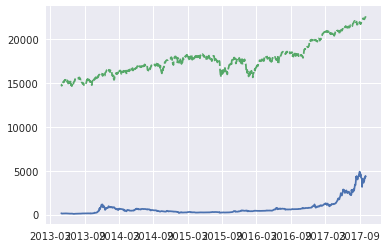

In [13]:
plt.plot(df['Date'],df['Close'])
plt.plot(dj['Date'],dj['Close'],linestyle = '--')

In [14]:
# import matplotlib.dates as mdates
# month_day_fmt = mdates.DateFormatter('%b %d') # "Locale's abbreviated month name. + day of the month"
# ax.xaxis.set_major_formatter(month_day_fmt)

In [15]:
from sklearn import preprocessing
df["SCP"] = preprocessing.scale(df["Close"])
dj["SCP"] = preprocessing.scale(dj["Close"])#scaled close price

In [39]:
x = df['Date']
y = df['SCP']
y1= dj['SCP']

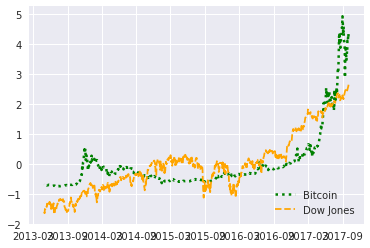

In [40]:
fig, ax = plt.subplots()

ax.plot(x,y,color='green', linestyle=':', label='Bitcoin',linewidth = 2.5)
ax.plot(x,y1,color='orange', linestyle='--', label = 'Dow Jones')
ax.legend(loc=4)